### Tempareture Forcast
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea..the objective is to build a model that can predictthe temp  basis of the accumulated details likelat	lon	DEM	Slope	Solar radiation	etc.

### Importing the required liabraries and Loading DataSet

In [1]:
# importing librarires:

# Data Wranglers
import numpy as np
import pandas as pd

# visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# stats dependency
from scipy import stats
# feature_engineering dependency
import feature_engine

#Avoid warnings
import warnings
warnings.filterwarnings('ignore')

### LOADING DATASET

In [9]:
df = pd.read_csv('temperature.csv',parse_dates=['Date'])
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [10]:
#Dataset details 
# more infor on the dataset 
print('Size of dataset \n ',df.shape,'\n')
print('Details dataset\n' ,df.info(),'\n')
print('Checking for NULL/Missing values \n',df.isna().sum())

Size of dataset 
  (7752, 25) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7750 non-null   float64       
 1   Date              7750 non-null   datetime64[ns]
 2   Present_Tmax      7682 non-null   float64       
 3   Present_Tmin      7682 non-null   float64       
 4   LDAPS_RHmin       7677 non-null   float64       
 5   LDAPS_RHmax       7677 non-null   float64       
 6   LDAPS_Tmax_lapse  7677 non-null   float64       
 7   LDAPS_Tmin_lapse  7677 non-null   float64       
 8   LDAPS_WS          7677 non-null   float64       
 9   LDAPS_LH          7677 non-null   float64       
 10  LDAPS_CC1         7677 non-null   float64       
 11  LDAPS_CC2         7677 non-null   float64       
 12  LDAPS_CC3         7677 non-null   float64       
 13  LDAPS_CC4         7677 non-null   float64     

In [11]:
#Listing categorcal or Numeric Coulumn 
cat_col,num_col=[],[]
for i in df:
    if df[i].dtype=='O':
        cat_col.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        num_col.append(i)
    else: continue
print('>>> Total Number of Feature::', df.shape[1])
print('>>> Number of categorical features::', len(cat_col))
print('>>> Number of Numerical Feature::', len(num_col))

>>> Total Number of Feature:: 25
>>> Number of categorical features:: 0
>>> Number of Numerical Feature:: 24


In [14]:
cat_col

[]

In [6]:
num_col

['station',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

In [13]:
df.describe(include = 'all')

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7750,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
unique,NaN,310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2017-08-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2013-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2017-12-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,13.000000,NaN,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,NaN,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,NaN,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,NaN,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000


In [15]:
# we observed  a  lot of missing values 
df.isna().mean()

station             0.000258
Date                0.000258
Present_Tmax        0.009030
Present_Tmin        0.009030
LDAPS_RHmin         0.009675
LDAPS_RHmax         0.009675
LDAPS_Tmax_lapse    0.009675
LDAPS_Tmin_lapse    0.009675
LDAPS_WS            0.009675
LDAPS_LH            0.009675
LDAPS_CC1           0.009675
LDAPS_CC2           0.009675
LDAPS_CC3           0.009675
LDAPS_CC4           0.009675
LDAPS_PPT1          0.009675
LDAPS_PPT2          0.009675
LDAPS_PPT3          0.009675
LDAPS_PPT4          0.009675
lat                 0.000000
lon                 0.000000
DEM                 0.000000
Slope               0.000000
Solar radiation     0.000000
Next_Tmax           0.003483
Next_Tmin           0.003483
dtype: float64

In [16]:
# checking for any highly correlated features in the dataset.
df_corr=df.corr()
df_corr

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113211,0.132419,-0.067122,-0.168010,0.069561,0.105422,0.005320,-0.134226,0.006956,...,-0.008369,-0.012671,-0.010580,-0.237610,-0.118763,-0.255970,-0.090113,-0.019011,0.108306,0.128719
Present_Tmax,0.113211,1.000000,0.618760,-0.206782,-0.304209,0.575289,0.629247,-0.122876,0.136716,-0.314863,...,-0.100420,-0.121271,-0.101471,-0.052776,0.009075,-0.187855,-0.106097,-0.025557,0.613109,0.625252
Present_Tmin,0.132419,0.618760,1.000000,0.124921,-0.015334,0.470118,0.772921,-0.035111,-0.009368,0.085593,...,0.069095,-0.046645,-0.064394,-0.078715,-0.043725,-0.251257,-0.146736,0.053828,0.473868,0.799758
LDAPS_RHmin,-0.067122,-0.206782,0.124921,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,...,0.390967,0.240642,0.168595,0.087523,-0.076608,0.102612,0.124346,0.244795,-0.442958,0.095830
LDAPS_RHmax,-0.168010,-0.304209,-0.015334,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,...,0.229050,0.134607,0.117853,0.196751,0.025792,0.178031,0.220668,0.149699,-0.286478,-0.072490
LDAPS_Tmax_lapse,0.069561,0.575289,0.470118,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,...,-0.242122,-0.188115,-0.160273,-0.042298,0.091107,-0.179766,-0.163123,0.048111,0.836144,0.591535
LDAPS_Tmin_lapse,0.105422,0.629247,0.772921,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,...,0.000870,-0.088575,-0.094655,-0.096726,-0.026831,-0.196407,-0.186753,0.160443,0.593195,0.886964
LDAPS_WS,0.005320,-0.122876,-0.035111,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,...,0.191886,0.161684,0.144085,0.036836,-0.059756,0.191983,0.172464,0.122116,-0.346592,-0.097390
LDAPS_LH,-0.134226,0.136716,-0.009368,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,...,-0.077545,0.016102,0.019979,0.133870,0.025948,0.055402,0.087203,-0.047523,0.159324,-0.055895
LDAPS_CC1,0.006956,-0.314863,0.085593,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,...,0.389453,0.168742,0.091722,-0.008170,-0.006876,-0.014159,-0.020853,0.218949,-0.457583,-0.011129


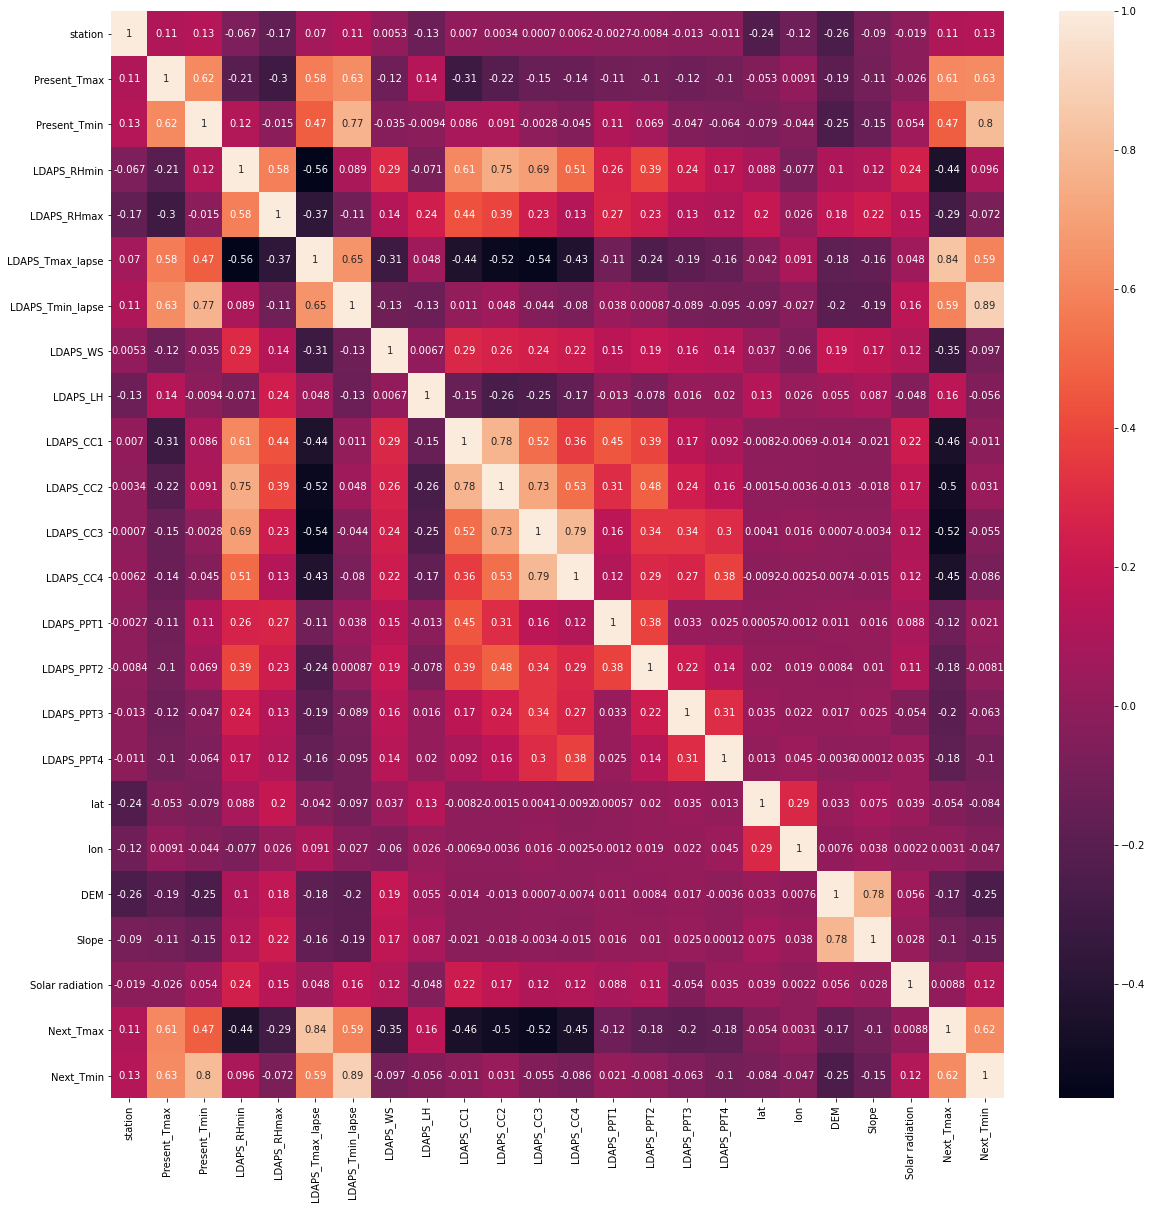

In [20]:
#VIsualisation
plt.figure(figsize=(20,20))
# plotting the correlation heatmap
sns.heatmap(df_corr,annot=True)
plt.show()

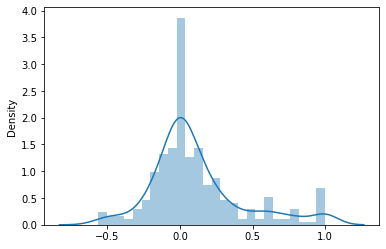

In [22]:
# plotting the correlation
sns.distplot(df.corr())
plt.show()

* The dataset has a size of 7752 records over 25 columns .
* There are Two Target variables
* There are no highly correlated columns in the dataset.
* The datasets looks to have outliers and have null values approx 1 percentper column

In [23]:
df.sample(5)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
1734,10.0,2014-07-07,31.8,18.0,59.952461,91.583237,27.783345,22.454596,5.924127,60.465162,...,0.083347,0.221836,0.000000,37.4562,126.955,208.5070,5.1782,5838.026855,29.4,21.6
1301,2.0,2013-08-21,32.5,21.4,45.903221,80.909042,34.048440,26.775254,5.353170,50.566296,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.5141,4803.372070,33.0,24.2
7601,2.0,2017-08-25,29.5,20.5,34.619366,83.529198,28.849874,19.794748,6.002242,73.595390,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.5141,4657.507813,28.4,16.9
5338,14.0,2016-07-27,29.2,26.2,56.603710,92.441231,29.948036,24.794770,7.385683,27.305806,...,0.288782,0.000000,0.000000,37.4967,126.927,30.9680,0.6180,5482.193848,30.7,26.6
5307,8.0,2016-07-26,31.0,25.9,74.959236,98.703102,28.101576,25.390562,8.645355,33.453835,...,1.591379,0.572578,0.193704,37.4697,126.910,52.5180,1.5629,5505.750000,29.2,26.5


In [ ]:
#UNIVARITE ANALYSIS

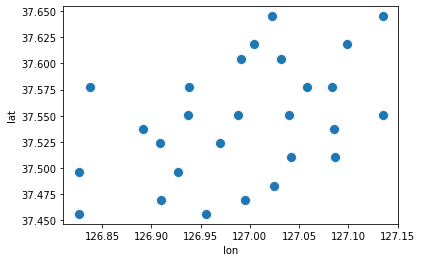

In [29]:
#latitude and logitudes 
sns.scatterplot(df.lon,df.lat,s=100)
plt.show()

In [30]:
# date
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaT,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


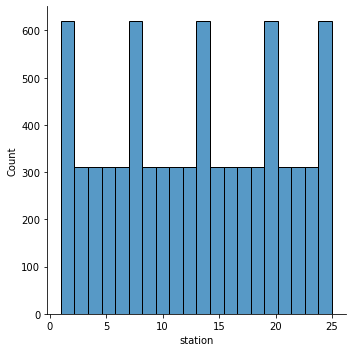

In [32]:
# stations
sns.displot(df.station)
plt.show()

<AxesSubplot:>

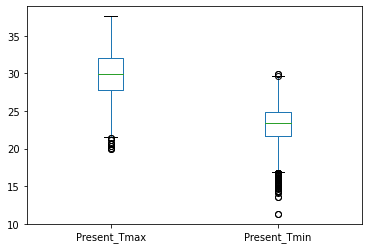

In [33]:
# min and max temperature
df[['Present_Tmax','Present_Tmin']].plot(kind='box')

In [ ]:
#Dealing with  the missing values

In [36]:
num_col

['station',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

In [37]:
# create a new dataframe for computatioonal Purposes.
df_cleaned = df.copy()

In [38]:
df_cleaned = df_cleaned.dropna() #as the missing data less tha 1 percent

In [39]:
df_cleaned.isna().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

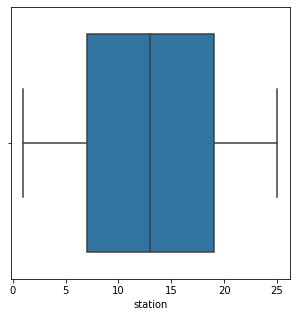

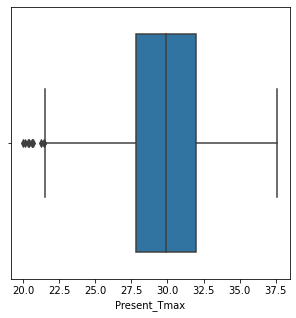

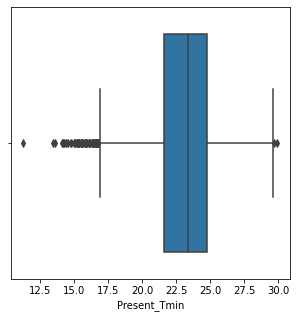

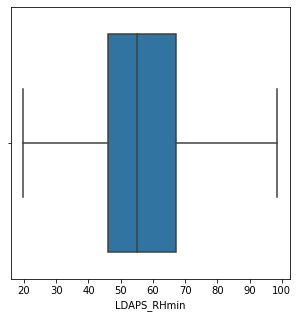

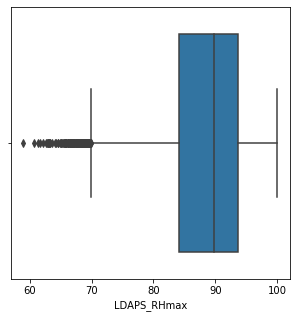

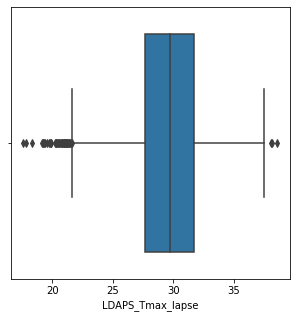

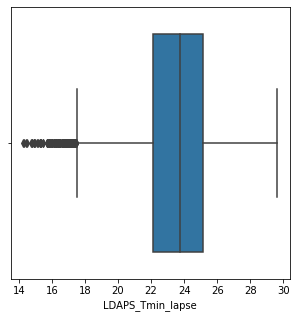

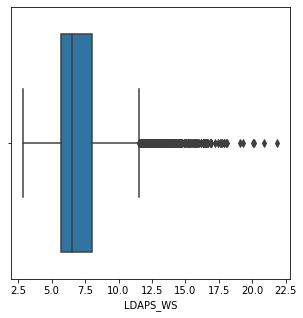

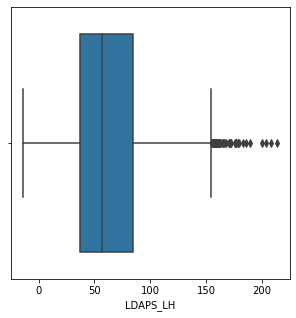

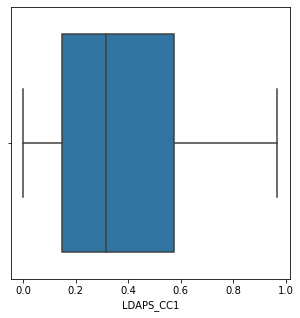

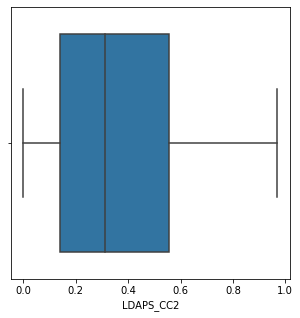

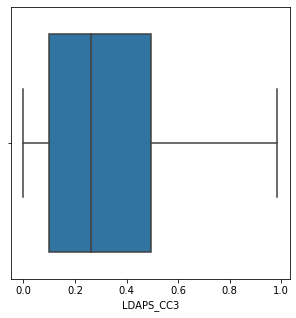

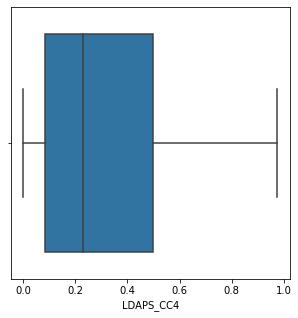

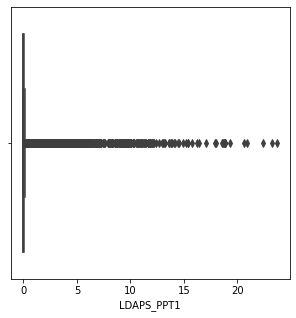

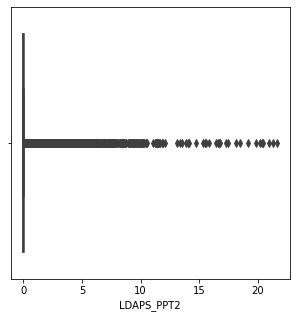

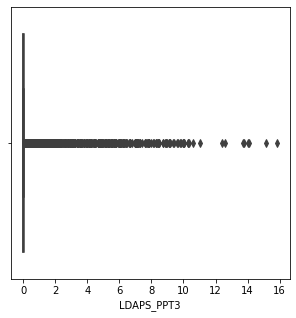

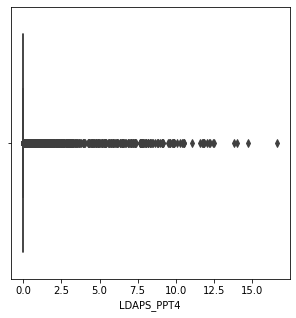

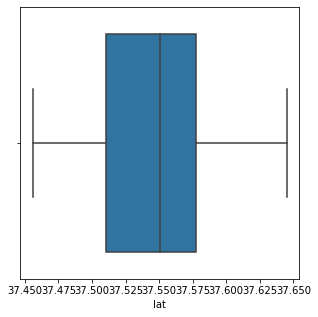

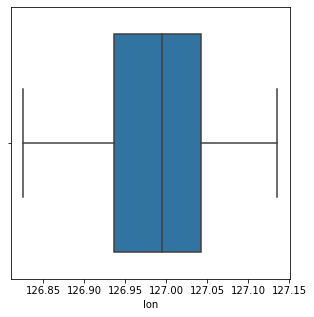

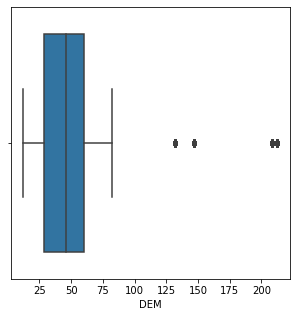

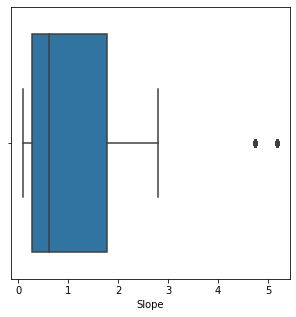

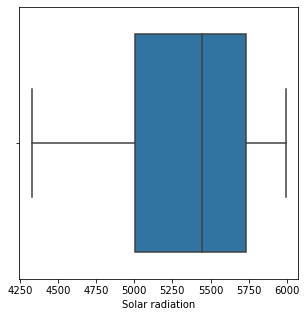

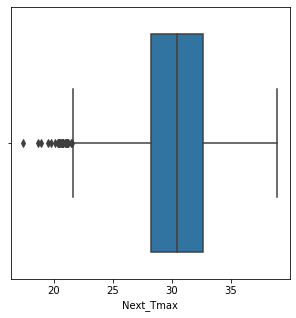

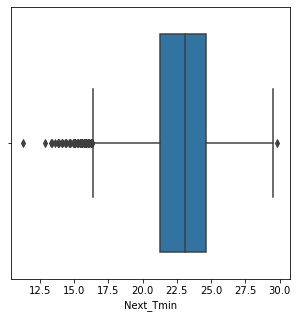

In [40]:
#Outlier removal

for i in num_col:
    plt.figure(figsize=(5,5))
    sns.boxplot(df_cleaned[i])
    plt.show()

In [41]:
#Dealing with  outliers using z score
z_scores = stats.zscore(df_cleaned[num_var])

abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)

df_cleaned = df_cleaned[filtered_entries]

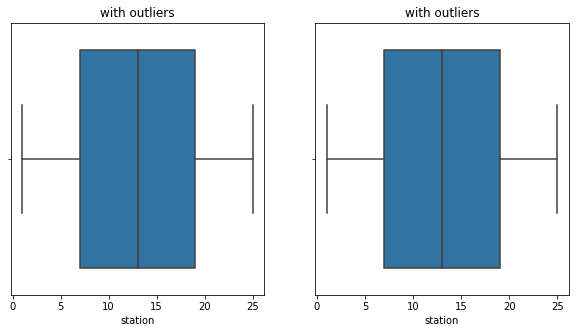

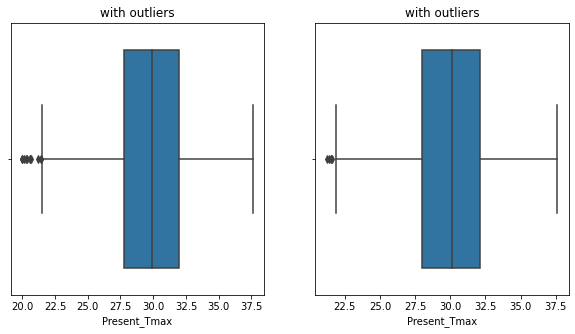

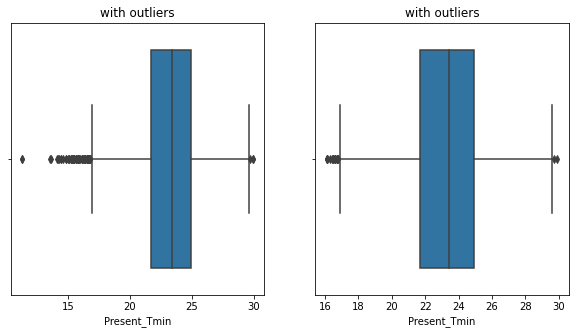

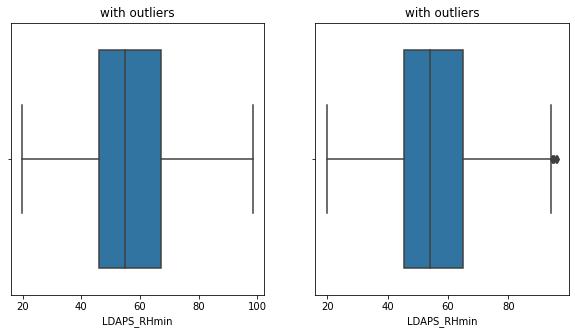

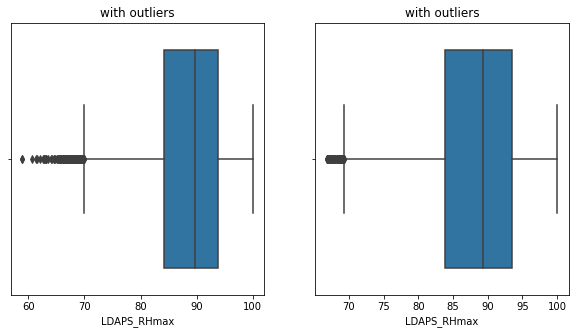

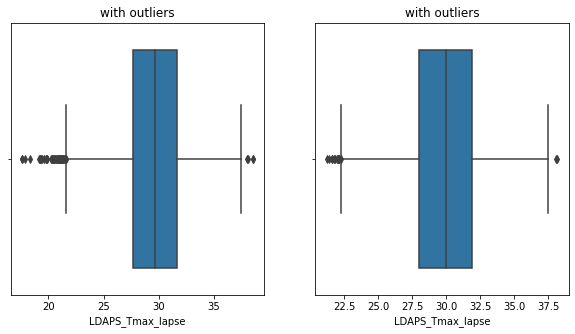

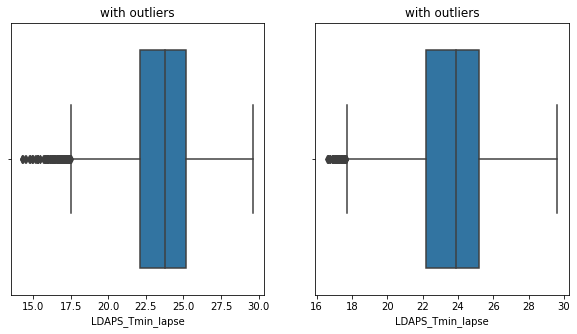

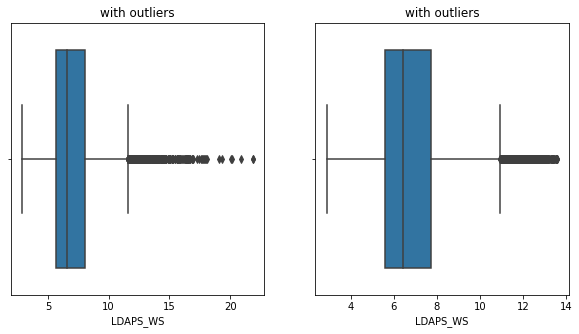

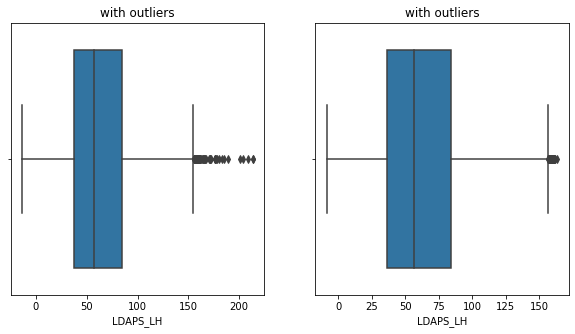

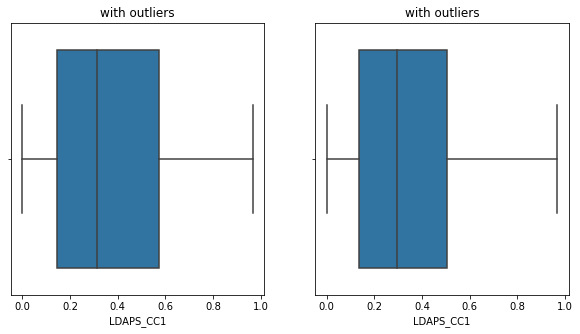

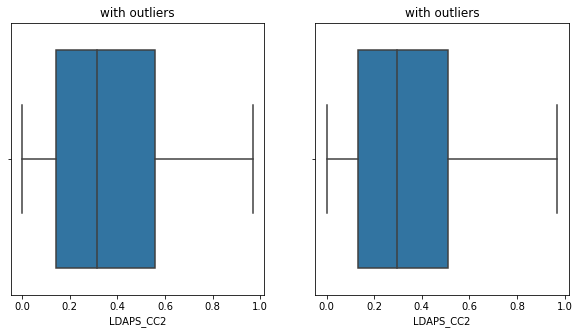

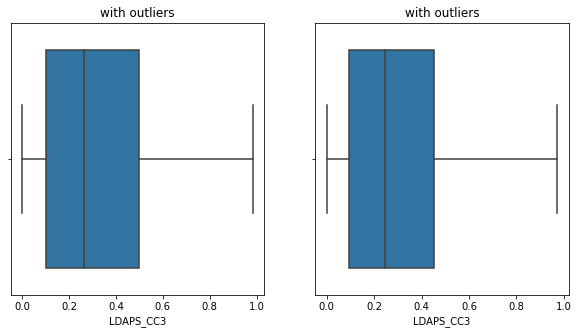

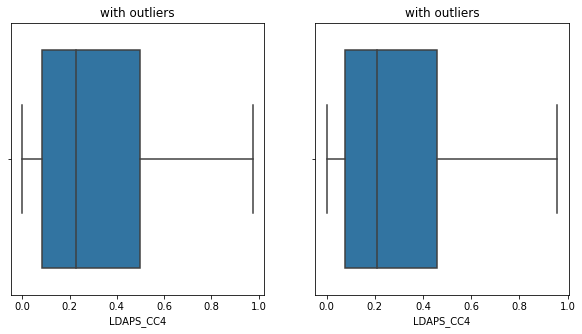

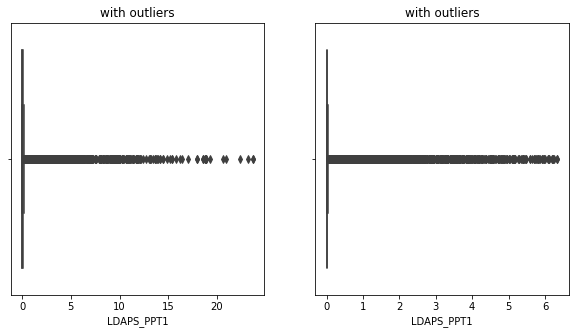

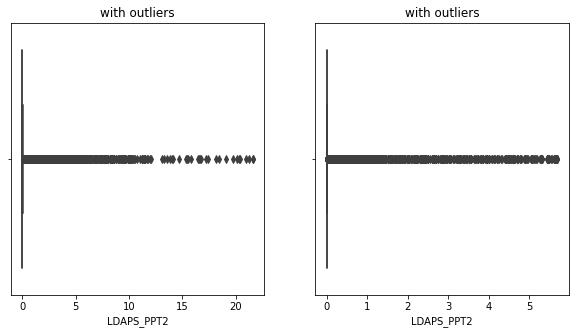

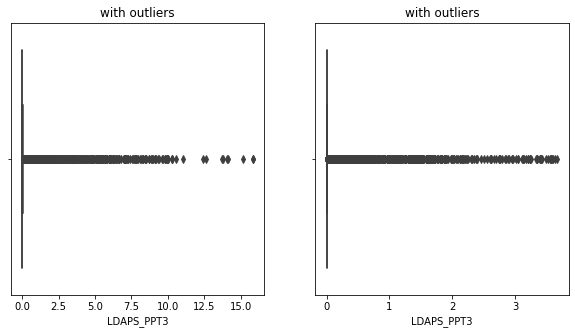

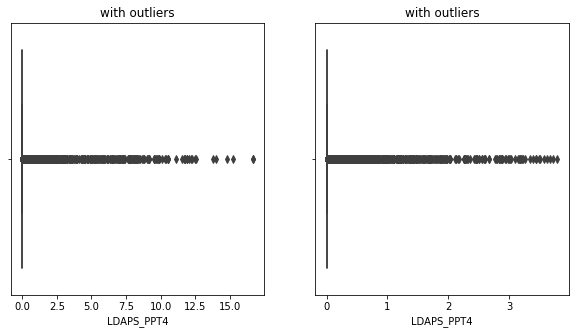

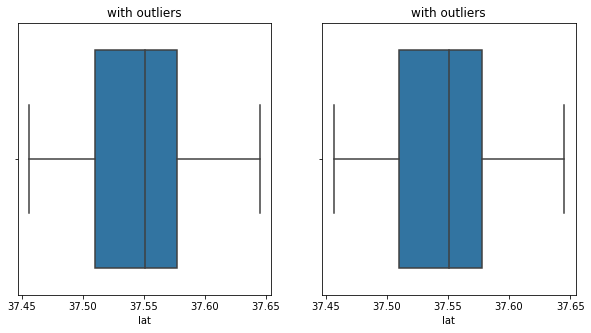

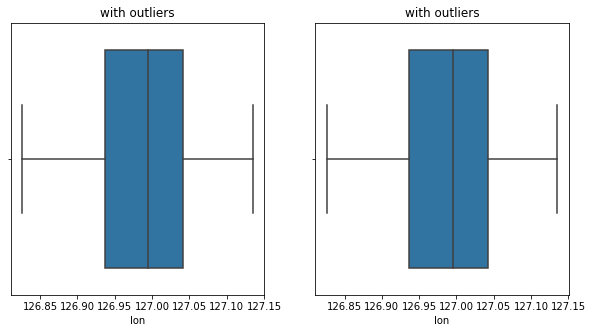

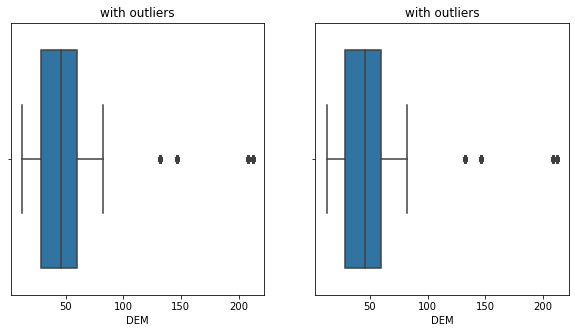

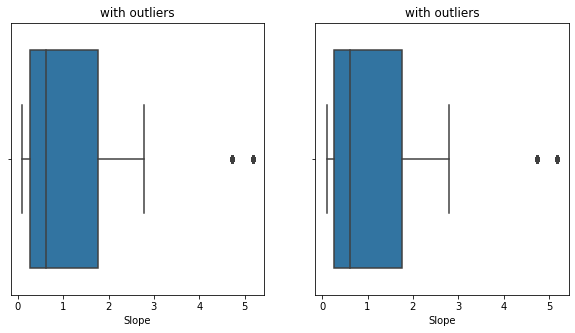

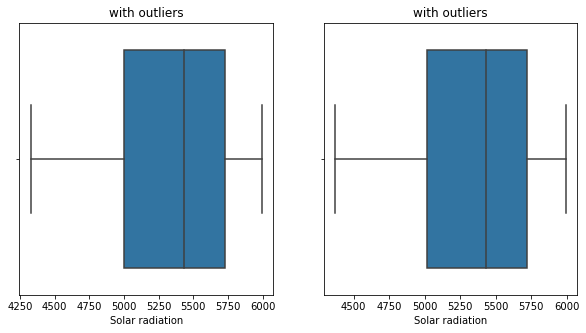

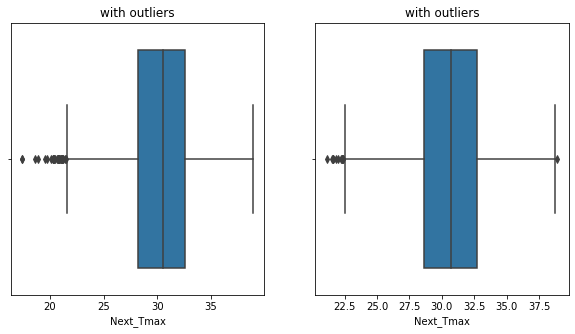

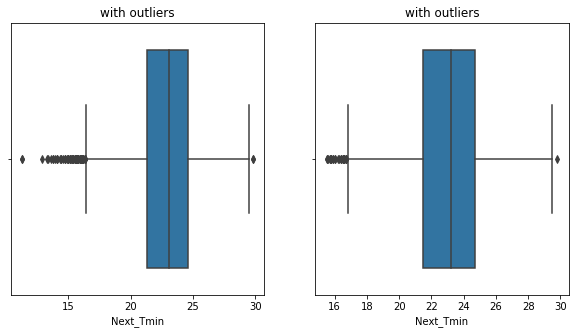

In [43]:
for i in num_var:
    fig =  plt.figure(figsize=(10,5))
    
    fig.add_subplot(121)
    sns.boxplot(df[i])
    plt.title('with outliers')
    fig.add_subplot(122)
    sns.boxplot(df_cleaned[i])
    plt.title('with outliers')

In [45]:
#Outliers removed
#Checking for skewness
df_cleaned.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
dtype: float64

In [46]:
#Dates  into diff parts 
df_cleaned['Month'] = df_cleaned.Date.apply(lambda x : x.month_name())
df_cleaned['Year'] = df_cleaned.Date.apply(lambda x:x.year )

In [47]:
#Drop Station and Date as we are usind Date in diff wasy and statipon is not required 
df_cleaned.drop(['station','Date'],1,inplace=True)
df_cleaned.sample(5)

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Year
2395,33.8,28.6,54.375328,87.397202,31.063539,25.125135,11.564225,75.201684,0.682432,0.487378,...,0.047530,37.5507,127.040,26.2980,0.5721,5370.370605,29.7,24.6,February,2014
5200,30.1,22.6,67.552711,86.601608,28.037817,23.385106,9.033499,87.313557,0.422547,0.761692,...,0.000000,37.6046,126.991,212.3350,2.7850,5728.645020,29.0,24.0,July,2016
7443,30.0,23.3,50.296509,82.906784,31.180343,23.353450,7.163996,60.128060,0.314319,0.233212,...,0.239443,37.5776,126.938,75.0924,1.7678,4938.088379,28.6,22.9,August,2017
4439,29.3,23.1,37.000286,75.067993,32.195848,23.207335,5.345282,30.729012,0.198768,0.017170,...,0.000000,37.5507,126.937,30.0464,0.8552,4772.682617,31.6,21.6,August,2015
6338,31.6,23.6,42.474598,88.443092,33.907473,25.434385,6.900923,36.104884,0.014932,0.018506,...,0.133790,37.4967,126.927,30.9680,0.6180,5825.110352,34.6,23.6,May,2017


In [48]:
# ENCODING 
from sklearn.preprocessing import LabelEncoder

lab_enc =LabelEncoder()

In [50]:
df_cleaned['Month']=lab_enc.fit_transform(df_cleaned['Month'])

In [51]:
df_cleaned.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,Year
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,6,2013
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,6,2013
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,6,2013
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,6,2013
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,6,2013


### Train Test  split

In [53]:
X = df_cleaned.drop(['Next_Tmax','Next_Tmin'],1)
y = df_cleaned[['Next_Tmax','Next_Tmin']]
# checking the shapes
X.shape,y.shape

((6739, 23), (6739, 2))

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [56]:
Xscaled=scaler.fit_transform(X)

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Xscaled,y,test_size=0.3,random_state=42)

In [58]:
# checking the shape
#shapes
print ('XTRAIN \n',X_train.shape)
print ('YTRAIN \n',y_train.shape)
print ('XTEST \n',X_test.shape)
print ('YTRAIN \n',y_test.shape)

XTRAIN 
 (4717, 23)
YTRAIN 
 (4717, 2)
XTEST 
 (2022, 23)
YTRAIN 
 (2022, 2)


In [59]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.108685,1.612418,0.552699,-0.366255,0.547903,1.512851,-0.455018,-0.638127,0.896949,0.366334,...,-0.254099,0.111674,-0.237604,-0.405930,-0.261269,-0.775165,-0.716095,0.168502,0.318671,0.726835
1,1.248175,1.352395,-0.220314,-1.088018,1.037925,1.746346,0.205402,-1.109280,-0.352629,0.075375,...,-0.210013,-0.258829,-0.237604,-0.405930,-0.261269,-0.775165,-0.716095,-0.752599,-1.053769,-1.421473
2,1.213303,0.875687,-0.328304,0.218064,-1.625176,-0.936326,0.963275,1.534134,2.024566,1.173677,...,-0.094134,-0.258829,-0.237604,-1.215478,0.418087,-0.085977,-0.006035,-1.781699,-1.053769,0.726835
3,-0.704684,0.485653,0.813389,-0.252263,0.422059,0.903181,-0.611395,-1.481057,-0.175609,0.411463,...,-0.277993,-0.258829,-0.127369,0.133768,-0.676431,-0.579554,-0.284216,1.103799,-1.053769,1.442938
4,-0.286214,0.962361,-0.103361,-0.094023,0.853728,0.144739,-0.305594,-1.451934,-0.625038,-0.587415,...,-0.277993,-0.258829,-0.237604,0.671467,0.845830,-0.518594,-0.719941,0.829806,0.318671,1.442938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4712,0.690215,0.355642,0.877151,-0.114517,-1.108566,0.052337,-1.479523,-0.552068,-0.045234,1.601673,...,0.542625,-0.258829,-0.237604,-1.215478,0.418087,-0.085977,-0.006035,-0.847809,-1.053769,0.010733
4713,1.596900,1.742429,-0.530111,-1.703929,1.303565,1.451444,-0.669986,0.926556,-1.208547,-0.888067,...,-0.277993,-0.254620,-0.237604,-0.136081,-1.255142,-0.849894,-0.801820,-1.082151,-1.053769,0.726835
4714,0.969195,2.045789,-0.333246,-1.469379,1.098678,1.619691,-0.530085,-0.017162,0.950491,-0.101255,...,-0.277993,-0.258829,-0.237604,-1.485327,-1.016109,-0.159398,0.239232,-1.248823,-1.053769,0.726835
4715,-0.076979,-1.897887,0.145820,0.277132,-1.976518,-2.314222,0.730847,1.142160,1.291542,0.541461,...,-0.277993,-0.258829,2.653060,-1.215478,0.418087,-0.085977,-0.006035,-1.966870,-1.053769,0.726835


### Model Buliding 

In [60]:
# importing the model to used for trainng 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor



# importing the evaluation metrics
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import r2_score,mean_squared_error

In [61]:
#Reusable Function 
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    y_preds = model.predict(X_test)
    
    print('R2_score',r2_score(y_test,y_preds))
    print('MSE',mean_squared_error(y_test,y_preds))

In [62]:
## As this has two targets , it will behave like the multivariable

In [66]:
train_n_ret_scores(LinearRegression())

R2_score 0.7804609024223849
MSE 1.5865628182784284


In [67]:
#Model2 KNN
train_n_ret_scores(KNeighborsRegressor())

R2_score 0.8705331426421634
MSE 0.9073170128585577


In [69]:
#Model3 KNN
train_n_ret_scores(DecisionTreeRegressor())

R2_score 0.728440760992755
MSE 1.9024282888229513


In [70]:
#model4 RandomForestRegressor()
train_n_ret_scores(RandomForestRegressor())

R2_score 0.8861713480796134
MSE 0.8004910858061323


In [71]:
from sklearn.model_selection import cross_val_score

In [76]:
#Cross Validation 
cvLR =cross_val_score(LinearRegression(),Xscaled,y,cv=3)
cvSVR=cross_val_score(KNeighborsRegressor(),Xscaled,y,cv=3)
cvDTR=cross_val_score(DecisionTreeRegressor(),Xscaled,y,cv=3)
cvRF=cross_val_score(RandomForestRegressor(),Xscaled,y,cv=3)
print ('\n CV score LR',cvLR.mean())
print ('\n CV score RAndom Forest',cvRF.mean())
print ('\n CV score SVR',cvSVR.mean())
print ('\n CV score DTR',cvDTR.mean())



 CV score LR 0.7171176249146504

 CV score XGB 0.7050410927493672

 CV score SVR 0.5412899158734126

 CV score DTR 0.42551505397330697


In [77]:
print ('\n CV score LR',cvLR.mean())
print ('\n CV score RAndom Forest',cvRF.mean())
print ('\n CV score SVR',cvSVR.mean())
print ('\n CV score DTR',cvDTR.mean())


 CV score LR 0.7171176249146504

 CV score RAndom Forest 0.7050410927493672

 CV score SVR 0.5412899158734126

 CV score DTR 0.42551505397330697


### RandomForest REGRESSOR is the best one 
## HYPER PARAMETER TUNING TO BE DONE on RandomForestRegressor( )

In [106]:
from sklearn.model_selection import GridSearchCV

param = {
 'min_samples_leaf': [1, 2,],
 'min_samples_split': [2, 5],
 'n_estimators': [100]}

In [107]:
GSV = GridSearchCV(RandomForestRegressor(),param,cv=3)
GSV.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5], 'n_estimators': [100]})

### BEST PARAMS_

In [108]:
GSV.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

### Modelling Using best parameters

In [100]:
Best_model = RandomForestRegressor(min_samples_leaf=4,n_estimators=100)

In [101]:
train_n_ret_scores(Best_model)

R2_score 0.8741590305156309
MSE 0.8820349034773842


In [102]:
y_preds = Best_model.predict(X_test)

In [103]:
y_preds

array([[29.66071912, 23.27100756],
       [29.10963473, 21.06018926],
       [32.3653042 , 26.37491637],
       ...,
       [28.19839774, 20.7920006 ],
       [26.03460214, 22.02258559],
       [24.94475064, 20.73916342]])

### Saving Model 

In [104]:
import joblib
joblib.dump(Best_model,'Temparature_Forecast.pk1')


['Temparature_Forecast.pk1']